## Working on Loan data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset and clean data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/loan_train.csv')
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

**Drop Loan_ID**

In [ ]:
df = df.drop('Loan_ID', axis=1)

In [ ]:

df

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 12 columns]

In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
numericdf = df.select_dtypes(include=['int64', 'float64'])
numericdf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

In [ ]:
categoricaldf = df.select_dtypes(include=['object'])
categoricaldf = categoricaldf.drop(columns='Loan_Status')
categoricaldf.head()

Gender Married Dependents     Education Self_Employed Property_Area
0   Male      No          0      Graduate            No         Urban
1   Male     Yes          1      Graduate            No         Rural
2   Male     Yes          0      Graduate           Yes         Urban
3   Male     Yes          0  Not Graduate            No         Urban
4   Male      No          0      Graduate            No         Urban

In [ ]:
categoricaldf.Gender.value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

**Impute null values**

- For the numeric columns, replace missing values with the mean along each column.

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(numericdf)
numeric_imp = imp_mean.transform(numericdf)

In [ ]:
numeric_imp

array([[5.84900000e+03, 0.00000000e+00, 1.46412162e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 1.50800000e+03, 1.28000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [3.00000000e+03, 0.00000000e+00, 6.60000000e+01, 3.60000000e+02,
        1.00000000e+00],
       ...,
       [8.07200000e+03, 2.40000000e+02, 2.53000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [7.58300000e+03, 0.00000000e+00, 1.87000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 0.00000000e+00, 1.33000000e+02, 3.60000000e+02,
        0.00000000e+00]])

Convert back to DataFrame

In [ ]:
numericdf = pd.DataFrame(data=numeric_imp, columns=numericdf.columns)
numericdf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0  146.412162             360.0   
1           4583.0             1508.0  128.000000             360.0   
2           3000.0                0.0   66.000000             360.0   
3           2583.0             2358.0  120.000000             360.0   
4           6000.0                0.0  141.000000             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

In [ ]:
numericdf.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

- Filling with most occurring class for the categorical columns

- To fill these missing values, replace them with the most common class. We can do this by taking the index of the most common class which can be determined by using value_counts() method.

In [ ]:
# filling with most common class
categoricaldf = categoricaldf.apply(lambda x: x.fillna(x.value_counts().index[0]))
categoricaldf

Gender Married Dependents     Education Self_Employed Property_Area
0      Male      No          0      Graduate            No         Urban
1      Male     Yes          1      Graduate            No         Rural
2      Male     Yes          0      Graduate           Yes         Urban
3      Male     Yes          0  Not Graduate            No         Urban
4      Male      No          0      Graduate            No         Urban
..      ...     ...        ...           ...           ...           ...
609  Female      No          0      Graduate            No         Rural
610    Male     Yes         3+      Graduate            No         Rural
611    Male     Yes          1      Graduate            No         Urban
612    Male     Yes          2      Graduate            No         Urban
613  Female      No          0      Graduate           Yes     Semiurban

[614 rows x 6 columns]

In [ ]:
categoricaldf.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [ ]:
categoricaldf.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:
def get_gender(value):
    if value == 'Male':
        return 1
    else:
        return 0

In [ ]:
categoricaldf.Gender = categoricaldf.Gender.map(get_gender)
categoricaldf.head(10)

Gender Married Dependents     Education Self_Employed Property_Area
0       1      No          0      Graduate            No         Urban
1       1     Yes          1      Graduate            No         Rural
2       1     Yes          0      Graduate           Yes         Urban
3       1     Yes          0  Not Graduate            No         Urban
4       1      No          0      Graduate            No         Urban
5       1     Yes          2      Graduate           Yes         Urban
6       1     Yes          0  Not Graduate            No         Urban
7       1     Yes         3+      Graduate            No     Semiurban
8       1     Yes          2      Graduate            No         Urban
9       1     Yes          1      Graduate            No     Semiurban

In [ ]:
categoricaldf.Married.value_counts()


Yes    401
No     213
Name: Married, dtype: int64

In [ ]:
def get_married(value):
    if value == 'Yes':
        return 1
    else:
        return 0

In [ ]:
categoricaldf.Married = categoricaldf.Married.map(get_married)
categoricaldf.head(10)

Gender  Married Dependents     Education Self_Employed Property_Area
0       1        0          0      Graduate            No         Urban
1       1        1          1      Graduate            No         Rural
2       1        1          0      Graduate           Yes         Urban
3       1        1          0  Not Graduate            No         Urban
4       1        0          0      Graduate            No         Urban
5       1        1          2      Graduate           Yes         Urban
6       1        1          0  Not Graduate            No         Urban
7       1        1         3+      Graduate            No     Semiurban
8       1        1          2      Graduate            No         Urban
9       1        1          1      Graduate            No     Semiurban

In [ ]:
categoricaldf.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
def get_dependents(value):
    if value == '0':
        return 0

    if value == '1':
        return 1

    if value == '2':
        return 2

    else:
        return 3


In [ ]:
categoricaldf.Dependents = categoricaldf.Dependents.map(get_dependents)
categoricaldf.head(10)

Gender  Married  Dependents     Education Self_Employed Property_Area
0       1        0           0      Graduate            No         Urban
1       1        1           1      Graduate            No         Rural
2       1        1           0      Graduate           Yes         Urban
3       1        1           0  Not Graduate            No         Urban
4       1        0           0      Graduate            No         Urban
5       1        1           2      Graduate           Yes         Urban
6       1        1           0  Not Graduate            No         Urban
7       1        1           3      Graduate            No     Semiurban
8       1        1           2      Graduate            No         Urban
9       1        1           1      Graduate            No     Semiurban

In [ ]:
categoricaldf.Education.value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
def get_education(value):
    if value == 'Graduate':
        return 1
    else:
        return 0

In [ ]:
categoricaldf.Education = categoricaldf.Education.map(get_education)

In [ ]:

categoricaldf['Self_Employed'].value_counts()


No     532
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
def get_selfemployed(value):
    if value == 'Yes':
        return 1
    else:
        return 0

In [ ]:
categoricaldf.Self_Employed = categoricaldf.Self_Employed.map(get_selfemployed)
categoricaldf.head()

Gender  Married  Dependents  Education  Self_Employed Property_Area
0       1        0           0          1              0         Urban
1       1        1           1          1              0         Rural
2       1        1           0          1              1         Urban
3       1        1           0          0              0         Urban
4       1        0           0          1              0         Urban

Using One-Hot-Encoding for Property area

In [ ]:
categoricaldf.Property_Area.value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoded_data = pd.get_dummies(categoricaldf, columns = ['Property_Area'])
categoricaldf = one_hot_encoded_data
categoricaldf.head()

Gender  Married  Dependents  Education  Self_Employed  Property_Area_Rural  \
0       1        0           0          1              0                    0   
1       1        1           1          1              0                    1   
2       1        1           0          1              1                    0   
3       1        1           0          0              0                    0   
4       1        0           0          1              0                    0   

   Property_Area_Semiurban  Property_Area_Urban  
0                        0                    1  
1                        0                    0  
2                        0                    1  
3                        0                    1  
4                        0                    1

In [ ]:
categoricaldf.dtypes

Gender                     int64
Married                    int64
Dependents                 int64
Education                  int64
Self_Employed              int64
Property_Area_Rural        uint8
Property_Area_Semiurban    uint8
Property_Area_Urban        uint8
dtype: object

Using Label encoding for the Loan_Status

In [ ]:
targetdf = df[['Loan_Status']]

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Loan_Status'.

encoded = label_encoder.fit_transform(targetdf['Loan_Status'])

targetdf = pd.DataFrame(encoded, columns=['Loan_Status'])
 

In [ ]:
targetdf.head()

Loan_Status
0            1
1            0
2            1
3            1
4            1

In [ ]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**Join the numericdf and categoricaldf**

In [ ]:
df = pd.concat([numericdf, categoricaldf, targetdf], axis=1)
df.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0  146.412162             360.0   
1           4583.0             1508.0  128.000000             360.0   
2           3000.0                0.0   66.000000             360.0   
3           2583.0             2358.0  120.000000             360.0   
4           6000.0                0.0  141.000000             360.0   

   Credit_History  Gender  Married  Dependents  Education  Self_Employed  \
0             1.0       1        0           0          1              0   
1             1.0       1        1           1          1              0   
2             1.0       1        1           0          1              1   
3             1.0       1        1           0          0              0   
4             1.0       1        0           0          1              0   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                    0                        0                    1   
1                    1                        0                    0   
2                    0                        0                    1   
3                    0                        0                    1   
4                    0                        0                    1   

   Loan_Status  
0            1  
1            0  
2            1  
3            1  
4            1

# A high correlation can help us use dimension reduction, I will try to see the correlations


In [ ]:
corr = df.corr() 
corr

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome                 1.000000          -0.116605    0.565620   
CoapplicantIncome              -0.116605           1.000000    0.187828   
LoanAmount                      0.565620           0.187828    1.000000   
Loan_Amount_Term               -0.045242          -0.059675    0.038801   
Credit_History                 -0.014477          -0.001665   -0.007738   
Gender                          0.058809           0.082912    0.107930   
Married                         0.051708           0.075948    0.147141   
Dependents                      0.118202           0.030430    0.163106   
Education                       0.140760           0.062290    0.166998   
Self_Employed                   0.127180          -0.016100    0.115260   
Property_Area_Rural             0.015829           0.005329    0.043178   
Property_Area_Semiurban        -0.014246          -0.027044   -0.008273   
Property_Area_Urban            -0.000598           0.022776   -0.033220   
Loan_Status                    -0.004710          -0.059187   -0.036416   

                         Loan_Amount_Term  Credit_History    Gender   Married  \
ApplicantIncome                 -0.045242       -0.014477  0.058809  0.051708   
CoapplicantIncome               -0.059675       -0.001665  0.082912  0.075948   
LoanAmount                       0.038801       -0.007738  0.107930  0.147141   
Loan_Amount_Term                 1.000000        0.001395 -0.073567 -0.100863   
Credit_History                   0.001395        1.000000  0.012819  0.005852   
Gender                          -0.073567        0.012819  1.000000  0.364569   
Married                         -0.100863        0.005852  0.364569  1.000000   
Dependents                      -0.101054       -0.037392  0.172914  0.334216   
Education                        0.077242        0.077936 -0.045364 -0.012304   
Self_Employed                   -0.033943       -0.002260 -0.000525  0.004489   
Property_Area_Rural              0.034433       -0.020132  0.080283 -0.006805   
Property_Area_Semiurban          0.061365        0.040757 -0.108623  0.005845   
Property_Area_Urban             -0.096683       -0.022621  0.034530  0.000546   
Loan_Status                     -0.020974        0.540483  0.017987  0.091478   

                         Dependents  Education  Self_Employed  \
ApplicantIncome            0.118202   0.140760       0.127180   
CoapplicantIncome          0.030430   0.062290      -0.016100   
LoanAmount                 0.163106   0.166998       0.115260   
Loan_Amount_Term          -0.101054   0.077242      -0.033943   
Credit_History            -0.037392   0.077936      -0.002260   
Gender                     0.172914  -0.045364      -0.000525   
Married                    0.334216  -0.012304       0.004489   
Dependents                 1.000000  -0.055752       0.056798   
Education                 -0.055752   1.000000       0.010383   
Self_Employed              0.056798   0.010383       1.000000   
Property_Area_Rural       -0.000816  -0.077520       0.022065   
Property_Area_Semiurban    0.001924   0.039410       0.008710   
Property_Area_Urban       -0.001198   0.034279      -0.030338   
Loan_Status                0.010118   0.085884      -0.003700   

                         Property_Area_Rural  Property_Area_Semiurban  \
ApplicantIncome                     0.015829                -0.014246   
CoapplicantIncome                   0.005329                -0.027044   
LoanAmount                          0.043178                -0.008273   
Loan_Amount_Term                    0.034433                 0.061365   
Credit_History                     -0.020132                 0.040757   
Gender                              0.080283                -0.108623   
Married                            -0.006805                 0.005845   
Dependents                         -0.000816                 0.001924   
Education                          -0.077520      

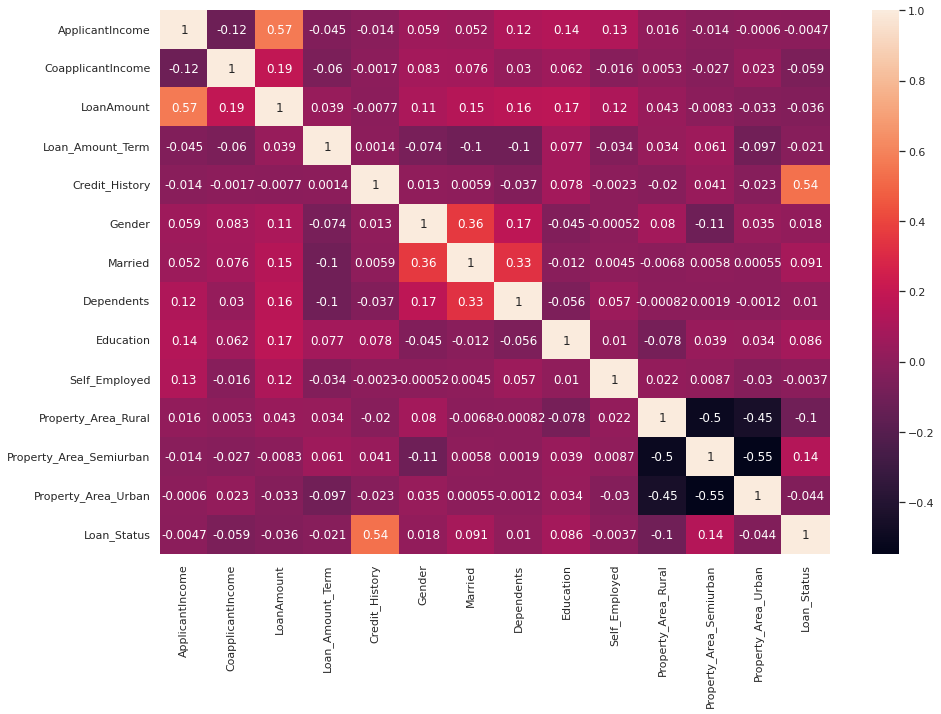

In [ ]:
# visualize correlation using heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()